In [47]:
import pandas as pd

In [48]:
snpvep = pd.read_csv("/home/kaira/Desktop/github_pipeline1/pipeline1/snps_pleiotropics_vep.txt", sep = "\t")
print(snpvep.head())
print(snpvep.shape)

  #Uploaded_variation             Location Allele  \
0      1:17672642:C:T  1:17672643-17672643      T   
1      1:17672642:C:T  1:17672643-17672643      T   
2      1:17672642:C:T  1:17672643-17672643      T   
3      1:17672642:C:T  1:17672643-17672643      T   
4      1:17672642:C:T  1:17672643-17672643      T   

                                    Consequence    IMPACT      SYMBOL  \
0                                intron_variant  MODIFIER       PADI4   
1                         upstream_gene_variant  MODIFIER       PADI4   
2  intron_variant,non_coding_transcript_variant  MODIFIER       PADI4   
3                         upstream_gene_variant  MODIFIER       PADI4   
4                                intron_variant  MODIFIER  AC004824.2   

              Gene Feature_type            Feature               BIOTYPE  ...  \
0  ENSG00000159339   Transcript  ENST00000375448.4        protein_coding  ...   
1  ENSG00000159339   Transcript  ENST00000467001.1  processed_transcript  ...   

/tmp/ipykernel_6928/3678386454.py:1: DtypeWarning: Columns (524,525) have mixed types. Specify dtype option on import or set low_memory=False.
  snpvep = pd.read_csv("/home/kaira/Desktop/github_pipeline1/pipeline1/snps_pleiotropics_vep.txt", sep = "\t")


In [49]:
# Remover linhas duplicadas baseadas na coluna '#Uploaded_variation'
snpvep = snpvep.drop_duplicates(subset=['#Uploaded_variation'], keep='first')
print(snpvep.shape)

(298, 528)


In [50]:
snp = pd.read_csv("/home/kaira/Desktop/github_pipeline1/pipeline1/snps_pleiotropicos.txt", sep="\t")
print(snp.head())
print(f'"before annotation" {snp.shape}')  
snp = snp.drop_duplicates(subset=['variants'], keep='first')
print(f'"after annotation" {snpvep.shape}') 

        variants
0  1:3410410:C:T
1  1:3417211:G:A
2  1:3511934:A:G
3  1:6279370:G:C
4  1:6529443:A:G
"before annotation" (1264, 1)
"after annotation" (298, 528)


In [51]:
import pandas as pd
import numpy as np


# Identificando colunas com apenas '-'
# colunas_com_traco = ad.columns[(ad == '-').all()]

# Substituindo '-' por NaN nas colunas numéricas
snpvep['gnomAD_exomes_POPMAX_AF'] = snpvep['gnomAD_exomes_POPMAX_AF'].replace('-', np.nan)
snpvep['gnomAD_genomes_POPMAX_AF'] = snpvep['gnomAD_genomes_POPMAX_AF'].replace('-', np.nan)

# Convertendo as colunas para float
snpvep['gnomAD_exomes_POPMAX_AF'] = snpvep['gnomAD_exomes_POPMAX_AF'].astype(float)
snpvep['gnomAD_genomes_POPMAX_AF'] = snpvep['gnomAD_genomes_POPMAX_AF'].astype(float)

# Criando a máscara para as linhas a serem removidas
mask = (snpvep['gnomAD_exomes_POPMAX_AF'] >= 0.01) | (snpvep['gnomAD_genomes_POPMAX_AF'] >= 0.01)

# Invertendo a máscara e filtrando o DataFrame
snpvep = snpvep[~mask]

# Mantendo apenas as colunas desejadas
# ad = ad.drop(colunas_com_traco, axis=1)
print(snpvep.shape)

(298, 528)


In [52]:
import pandas as pd

# ... (seu código existente)

# Filtrando o DataFrame para as linhas de interesse
# df_filtrado = ad[(ad['gnomAD_exomes_POPMAX_AF'] >= 1) | (ad['gnomAD_genomes_POPMAX_AF'] >= 1)]

# Calculando o intervalo dos valores nas colunas de interesse
intervalo_exomes = snpvep['gnomAD_exomes_POPMAX_AF'].agg(['min', 'max'])
intervalo_genomes = snpvep['gnomAD_genomes_POPMAX_AF'].agg(['min', 'max'])

# Imprimindo os intervalos
print("Intervalo de valores para gnomAD_exomes_POPMAX_AF:")
print(intervalo_exomes)
print("Intervalo de valores para gnomAD_genomes_POPMAX_AF:")
print(intervalo_genomes)

Intervalo de valores para gnomAD_exomes_POPMAX_AF:
min    0.000000
max    0.001537
Name: gnomAD_exomes_POPMAX_AF, dtype: float64
Intervalo de valores para gnomAD_genomes_POPMAX_AF:
min    0.000015
max    0.001450
Name: gnomAD_genomes_POPMAX_AF, dtype: float64


In [53]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'snpvep'

def encontrar_coluna_com_valor(df, valor):
  """
  Encontra a coluna em um DataFrame que contém o valor especificado.

  Args:
    df: O DataFrame a ser pesquisado.
    valor: O valor a ser encontrado.

  Returns:
    Uma lista com os nomes das colunas que contêm o valor, ou uma lista vazia se não for encontrado.
  """

  colunas_com_valor = []
  for coluna in df.columns:
    if valor in df[coluna].values:
      colunas_com_valor.append(coluna)
  return colunas_com_valor

# Encontrando a coluna com o valor 'benign(0.015)'
colunas = encontrar_coluna_com_valor(snpvep, 'benign(0.015)')

if colunas:
  print("A coluna(s) que contém o valor 'benign(0.015)' é(são):")
  print(colunas)
else:
  print("O valor 'benign(0.015)' não foi encontrado em nenhuma coluna.")

A coluna(s) que contém o valor 'benign(0.015)' é(são):
['PolyPhen']


In [54]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'ad'

# Obtendo os valores únicos da coluna 'ClinPred'
valores_unicos = snpvep['PolyPhen'].unique()

# Imprimindo os valores únicos
print("Valores únicos na coluna 'PolyPhen':")
print(valores_unicos)

Valores únicos na coluna 'PolyPhen':
['-' 'probably_damaging(0.995)' 'benign(0.085)' 'benign(0.031)'
 'possibly_damaging(0.506)' 'benign(0)' 'probably_damaging(0.996)'
 'probably_damaging(0.999)' 'benign(0.003)' 'benign(0.014)'
 'benign(0.281)' 'benign(0.105)' 'benign(0.216)' 'benign(0.022)'
 'benign(0.007)' 'possibly_damaging(0.738)' 'benign(0.065)'
 'probably_damaging(0.99)' 'benign(0.051)' 'benign(0.012)'
 'possibly_damaging(0.836)' 'benign(0.015)' 'benign(0.05)'
 'possibly_damaging(0.511)' 'benign(0.033)' 'probably_damaging(0.939)'
 'probably_damaging(0.959)' 'probably_damaging(0.968)'
 'probably_damaging(0.944)' 'possibly_damaging(0.852)'
 'probably_damaging(1)' 'probably_damaging(0.93)' 'benign(0.203)'
 'benign(0.153)' 'benign(0.001)' 'benign(0.169)' 'benign(0.244)'
 'probably_damaging(0.978)' 'probably_damaging(0.971)'
 'possibly_damaging(0.906)' 'probably_damaging(0.997)'
 'probably_damaging(0.986)' 'probably_damaging(0.998)'
 'probably_damaging(0.912)' 'benign(0.296)' 'benign(

In [55]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'ad'

# Obtendo os valores únicos da coluna 'ClinPred'
valores_unicos = snpvep['ClinPred'].unique()

# Imprimindo os valores únicos
print("Valores únicos na coluna 'ClinPred':")
print(valores_unicos)

Valores únicos na coluna 'ClinPred':
['-' '0.910653352737427' '0.0814549440172713' '0.068820107960437'
 '0.744193315505981' '0.0485466830432415' '0.995831906795502'
 '0.262581378221512' '0.0162097979336977' '0.0320790005271428'
 '0.263260692358017' '0.457702792466427' '0.214438002722453'
 '0.0680425761845359' '0.24167818633049' '0.0834161425922222'
 '0.0568284392356873' '0.987547755241394' '0.811365737539031'
 '0.979143559932709' '0.350113928318024' '0.037331454115969'
 '0.931893169879913' '0.510970207907624' '0.0363708758411996'
 '0.060176569968462' '0.979308426380157' '0.0647330026975191'
 '0.916807633711024' '0.985420763492584' '0.933717516868536'
 '0.0864689499139786' '0.95225191116333' '0.997561931610107'
 '0.931565761566162' '0.970464766025543' '0.981410562992096'
 '0.144183412194252' '0.0372778320439237' '0.0937457010149956'
 '0.0854417979717255' '0.153640456525542' '0.0303204378927619'
 '0.32380685210228' '0.0306685565249118' '0.999156594276428'
 '0.218879200491299' '0.05917706

In [56]:
linhas_originais = len(snpvep)
snpvep = snpvep[~snpvep['PolyPhen'].str.contains('benign', case=False, na=False)]
linhas_removidas = linhas_originais - len(snpvep)
print(f"Linhas removidas: {linhas_removidas}")

Linhas removidas: 101


In [57]:
linhas_originais = len(snpvep)
snpvep = snpvep.drop_duplicates(subset=['#Uploaded_variation'], keep='first')
linhas_removidas = linhas_originais - len(snpvep)
print(f"Linhas removidas: {linhas_removidas}")

Linhas removidas: 0


In [58]:
print(snpvep.shape)


(197, 528)


In [59]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'ad'

# Obtendo os valores únicos da coluna 'ClinPred'
valores_unicos = snpvep['IMPACT'].unique()

# Imprimindo os valores únicos
print("Valores únicos na coluna 'IMPACT':")
print(valores_unicos)

Valores únicos na coluna 'IMPACT':
['MODIFIER' 'MODERATE' 'HIGH' 'LOW']


In [60]:
linhas_originais = len(snpvep)
snpvep = snpvep[~snpvep['IMPACT'].str.contains('LOW', case=False, na=False)]
linhas_removidas = linhas_originais - len(snpvep)
print(f"Linhas removidas: {linhas_removidas}")

Linhas removidas: 59


In [61]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'ad'

# Obtendo os valores únicos da coluna 'ClinPred'
valores_unicos = snpvep['BLOSUM62'].unique()

# Imprimindo os valores únicos
print("Valores únicos na coluna 'BLOSUM62':")
print(valores_unicos)

Valores únicos na coluna 'BLOSUM62':
['-' '-1' '-2' '0' '-3' '1' '2' '3']


In [62]:

linhas_originais = len(snpvep)
# Usando regex para combinar '-1', '-2' ou '-3' (separados por |)
snpvep = snpvep[~snpvep['BLOSUM62'].str.contains(r'-1|-2|-3', case=False, na=False)]
linhas_removidas = linhas_originais - len(snpvep)
print(f"Linhas removidas: {linhas_removidas}")

Linhas removidas: 49


In [63]:
print(snpvep.shape)


(89, 528)


In [64]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'ad'

# Obtendo os valores únicos da coluna 'ClinPred'
valores_unicos = snpvep['Gene'].unique()

# Imprimindo os valores únicos
print("Valores únicos na coluna 'Gene':")
print(valores_unicos)

Valores únicos na coluna 'Gene':
['ENSG00000159339' 'ENSG00000215864' 'ENSG00000186400' 'ENSG00000145545'
 'ENSG00000142634' 'ENSG00000142798' 'ENSG00000219073' 'ENSG00000117602'
 'ENSG00000117676' 'ENSG00000162512' 'ENSG00000162398' 'ENSG00000189171'
 'ENSG00000143621' 'ENSG00000158869' 'ENSG00000120332' 'ENSG00000143466'
 'ENSG00000107736' 'ENSG00000148600' 'ENSG00000170242' 'ENSG00000212127'
 'ENSG00000134285' 'ENSG00000196531' 'ENSG00000132932' 'ENSG00000102738'
 'ENSG00000136155' 'ENSG00000041515' 'ENSG00000187498' 'ENSG00000129566'
 'ENSG00000185615' 'ENSG00000116176' 'ENSG00000100726' 'ENSG00000087253'
 'ENSG00000129910' 'ENSG00000187741' 'ENSG00000040531' 'ENSG00000006283'
 'ENSG00000068489' 'ENSG00000161509' 'ENSG00000101605' 'ENSG00000176136'
 'ENSG00000105289' 'ENSG00000167798' 'ENSG00000096996' 'ENSG00000105649'
 'ENSG00000130513' 'ENSG00000153902' 'ENSG00000160336' 'ENSG00000179954'
 'ENSG00000115207' 'ENSG00000214711' 'ENSG00000068781' 'ENSG00000170264'
 'ENSG00000124370'

In [65]:
import pandas as pd

# Supondo que você já tenha carregado seu DataFrame 'ad'

# Obtendo os valores únicos da coluna 'ClinPred'
valores_unicos = snpvep['GO'].unique()

# Imprimindo os valores únicos
print("Valores únicos na coluna 'GO':")
print(valores_unicos)

Valores únicos na coluna 'GO':
['GO:0004668:protein-arginine_deiminase_activity,GO:0005509:calcium_ion_binding,GO:0005515:protein_binding,GO:0005634:nucleus,GO:0005737:cytoplasm,GO:0006351:transcription_-_DNA-templated,GO:0006355:regulation_of_transcription_-_DNA-templated,GO:0006464:cellular_protein_modification_process,GO:0016568:chromatin_modification,GO:0016990:arginine_deiminase_activity,GO:0018101:protein_citrullination'
 '-'
 'GO:0004930:G-protein_coupled_receptor_activity,GO:0004984:olfactory_receptor_activity,GO:0005886:plasma_membrane,GO:0007186:G-protein_coupled_receptor_signaling_pathway,GO:0016021:integral_component_of_membrane'
 'GO:0003865:3-oxo-5-alpha-steroid_4-dehydrogenase_activity,GO:0005737:cytoplasm,GO:0005789:endoplasmic_reticulum_membrane,GO:0006629:lipid_metabolic_process,GO:0006702:androgen_biosynthetic_process,GO:0007530:sex_determination,GO:0007548:sex_differentiation,GO:0008202:steroid_metabolic_process,GO:0009055:electron_carrier_activity,GO:0016020:membra

In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


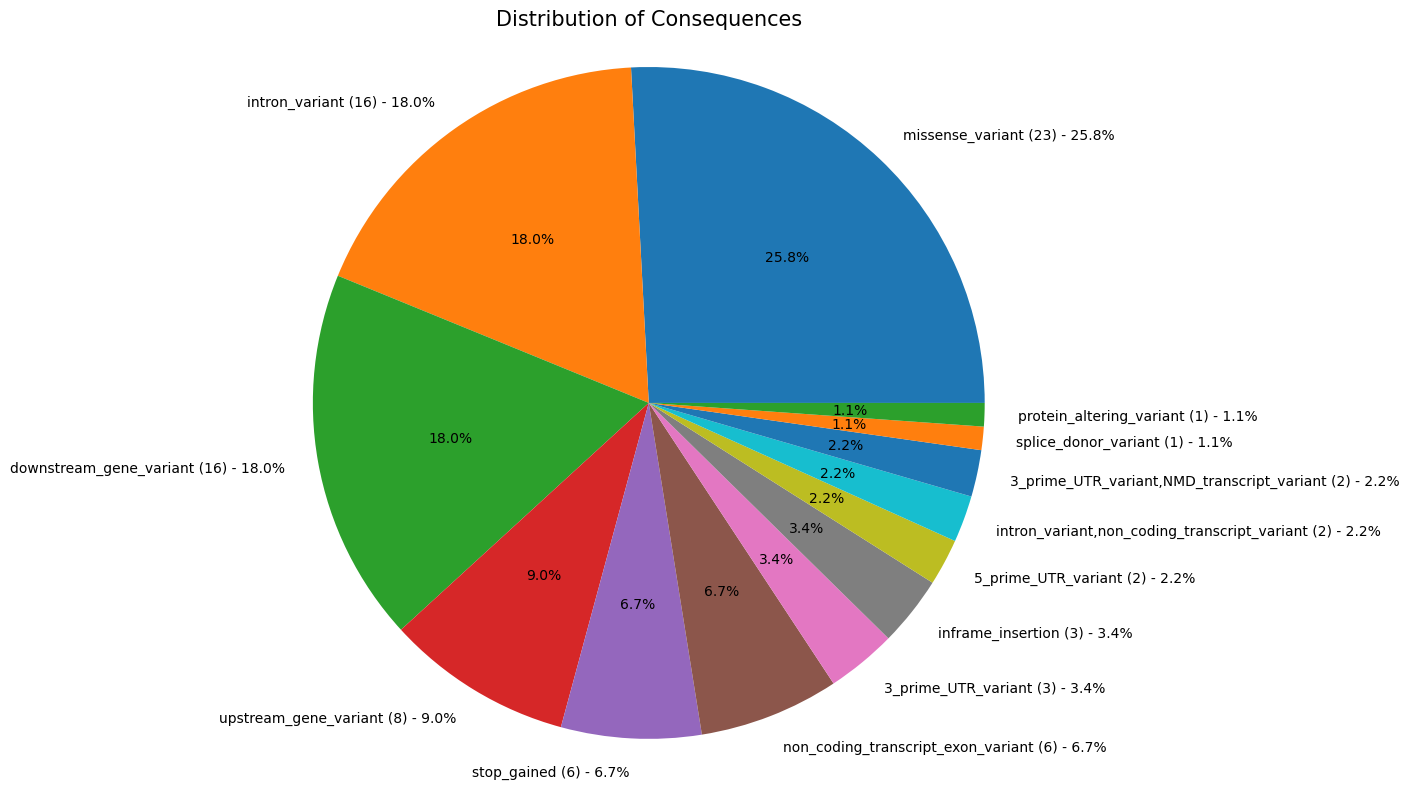

In [67]:
import matplotlib.pyplot as plt

# Conta a frequência de cada consequência
consequence_counts = snpvep['Consequence'].value_counts()

# Calcula as porcentagens
consequence_percentages = consequence_counts / len(snpvep) * 100

# Cria o gráfico de pizza
plt.figure(figsize=(12, 8))
plt.pie(consequence_counts, 
        labels=[f'{index} ({count}) - {percentage:.1f}%' 
                for index, count, percentage 
                in zip(consequence_counts.index, 
                       consequence_counts.values, 
                       consequence_percentages)],
        autopct='%1.1f%%')
plt.title('Distribution of Consequences', fontsize=15)
plt.axis('equal')  # Garante que o gráfico seja um círculo perfeito

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [68]:
snpvep.to_csv("snpvep_variants_Pleiotrapicas_filtradas.txt", sep = "\t")
